In [56]:
 %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from matplotlib import style
style.use("ggplot")
# from matplotlib import rcParams
# rcParams['figure.figsize'] = 10, 8

In [57]:
census = pd.read_csv('../data/combined_cleaned_encode.csv')
census.head()

,zipcode,total_crimes,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,crime rate,crime rating,crime encode
0,85746.0,29633.0,42704.0,31.8,41427.0,16176.0,10686.0,25.023417,0.693916,high,2.0
1,85706.0,38102.0,56989.0,27.5,29814.0,12164.0,20916.0,36.701820,0.668585,high,2.0
2,85756.0,8557.0,35522.0,31.8,46672.0,16574.0,5229.0,14.720455,0.240893,high,2.0
3,85747.0,4670.0,23490.0,34.5,81474.0,31039.0,1199.0,5.104300,0.198808,high,2.0
4,85748.0,2971.0,18275.0,45.4,69871.0,34353.0,1254.0,6.861833,0.162572,high,2.0


In [58]:
census.shape

(440, 11)

In [59]:
print(list(census.head(0)))

['zipcode', 'total_crimes', 'Population', 'Median Age', 'Household Income', 'Per Capita Income', 'Poverty Count', 'Poverty Rate', 'crime rate', 'crime rating', 'crime encode']


In [60]:
for index, row in census.iterrows():
    if(row['crime rating'] == "high"):
        blah = 1
    elif(row['crime rating'] == 'medium'):
        blah = 0
    else:
        blah = -1
    census.at[index, 'encode'] = blah
census.head()

# 1st model : 2categories Low - Medium
# 2nd model : 2categories Low - High
# Vote Hey Model 1 Whats your vote? Medium --
# Model 2 vote? High -- Low

,zipcode,total_crimes,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,crime rate,crime rating,crime encode,encode
0,85746.0,29633.0,42704.0,31.8,41427.0,16176.0,10686.0,25.023417,0.693916,high,2.0,1.0
1,85706.0,38102.0,56989.0,27.5,29814.0,12164.0,20916.0,36.701820,0.668585,high,2.0,1.0
2,85756.0,8557.0,35522.0,31.8,46672.0,16574.0,5229.0,14.720455,0.240893,high,2.0,1.0
3,85747.0,4670.0,23490.0,34.5,81474.0,31039.0,1199.0,5.104300,0.198808,high,2.0,1.0
4,85748.0,2971.0,18275.0,45.4,69871.0,34353.0,1254.0,6.861833,0.162572,high,2.0,1.0


In [61]:
census[census["crime rating"]== "low"].count()

zipcode              145
total_crimes         145
Population           145
Median Age           145
Household Income     145
Per Capita Income    145
Poverty Count        145
Poverty Rate         145
crime rate           145
crime rating         145
crime encode         145
encode               145
dtype: int64

In [62]:
target = census["encode"]
target_names = ["Low","Medium", "High"]

In [63]:
#data = census.drop(["crime_rating", "encode"], axis=1)
data = census[["Population",  "Median Age", "Poverty Rate", "crime rate" ]]
data.head()

,Population,Median Age,Poverty Rate,crime rate
0,42704.0,31.8,25.023417,0.693916
1,56989.0,27.5,36.701820,0.668585
2,35522.0,31.8,14.720455,0.240893
3,23490.0,34.5,5.104300,0.198808
4,18275.0,45.4,6.861833,0.162572


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [65]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# y_scaler = StandardScaler().fit(y_train)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

from keras.utils import to_categorical

# One-hot encoding
# y_train_categorical = to_categorical(y_train_scaled)
# y_test_categorical = to_categorical(y_test_scaled)

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [66]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
print('Test Acc: %.3f' % model.score(X_test_scaled, y_test))

Test Acc: 0.609


In [68]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

        Low       0.65      0.79      0.71        33
     Medium       0.50      0.51      0.51        35
       High       0.68      0.55      0.61        42

avg / total       0.61      0.61      0.61       110



In [69]:
X = np.array(census[["Poverty Rate", "Median Age", "Population", "crime rate" ]])
y = np.array(census["encode"])


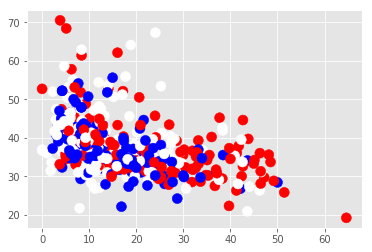

In [70]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [71]:
# WARNING! BOILERPLATE CODE HERE!
# Plot the decision boundaries
# x_min = X[:, 0].min()
# x_max = X[:, 0].max()
# y_min = X[:, 1].min()
# y_max = X[:, 1].max()

# XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
# Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(XX.shape)
# #plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
# plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
#             linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
# plt.show()
#plot wont show for three classes

ValueError: X.shape[1] = 2 should be equal to 4, the number of features at training time

In [72]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)


In [73]:
grid.fit(X_train_scaled, y_train)

predictions = grid.predict(X_test_scaled)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.5714285714285714, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.5412844036697247, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.5871559633027523, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.5714285714285714, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.5412844036697247, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.5871559633027523, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=10, gamma=0.001, score=0.5871559633027523, total=   0.0s
[CV] C=10, gamma=0.005 ...............................................
[CV] ...... C=10, gamma=0.005, score=0.6071428571428571, total=   0.0s
[CV] C=10, gamma=0.005 ...............................................
[CV] ...... C=10, gamma=0.005, score=0.5504587155963303, total=   0.0s
[CV] C=10, gamma=0.005 ...............................................
[CV] ...... C=10, gamma=0.005, score=0.5871559633027523, total=   0.0s
[CV] C=50, gamma=0.0001 ..............................................
[CV] ..... C=50, gamma=0.0001, score=0.6071428571428571, total=   0.0s
[CV] C=50, gamma=0.0001 ..............................................
[CV] ..... C=50, gamma=0.0001, score=0.5504587155963303, total=   0.0s
[CV] C=50, gamma=0.0001 ..............................................
[CV] ..... C=50, gamma=0.0001, score=0.5871559633027523, total=   0.0s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.4s finished


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

        Low       0.68      0.85      0.76        33
     Medium       0.51      0.51      0.51        35
       High       0.68      0.55      0.61        42

avg / total       0.63      0.63      0.62       110



In [75]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 5, 'gamma': 0.0001}
0.5818181818181818
